# Master I Informatique
## Intelligence Artificielle
### Introduction au Deep Learning - CNN

Dans ce note book, nous allons utiliser keras pour concevoir et entrainer un réseau de neurones avec une architecture CNN.

La chargement, le découpage et en général le prétraitement des données reste le même. Ce qui change essentiellement c'est l'architecture du réseau.

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [24]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#To input our values in our network Conv2D layer, we need to reshape the datasets, i.e.,
# pass from (60000, 28, 28) to (60000, 28, 28, 1) where 1 is the number of channels of our images
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

La commence réellement l'utilisation des CNN. Nous avons besoin d'importer un certain nombre d'autres éléments de la bibliothèque keras :

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

Et on définit notre réseau :

In [26]:
num_classes = 10

#Convert class vectors to binary class matrices ("one hot encoding")
## Doc : https://keras.io/utils/#to_categorical
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [27]:
def cnn():
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
    model.add(Conv2D(64,
                     kernel_size=(3,3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

On créee donc notre réseau :

In [28]:
model = cnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

et on l'antraine :

In [29]:
batch_size=64
epochs=5

hist = model.fit(X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=epochs,
            batch_size=batch_size)            

2021-12-09 17:14:35.574954: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
938/938 [==============================] - 77s 82ms/step - loss: 0.1285 - accuracy: 0.9612 - val_loss: 0.0465 - val_accuracy: 0.9850
Epoch 2/5
938/938 [==============================] - 73s 78ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 3/5
938/938 [==============================] - 77s 82ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 4/5
938/938 [==============================] - 71s 75ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0300 - val_accuracy: 0.9907
Epoch 5/5
938/938 [==============================] - 70s 75ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0364 - val_accuracy: 0.9896


Test loss:  0.03640342876315117
Test accuracy:  0.9896000027656555


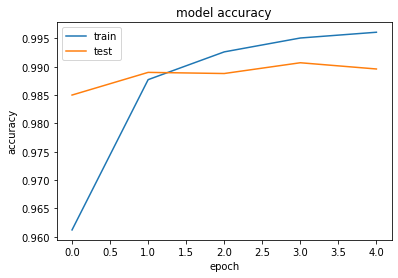

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
#plot accuracies
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()